Let us use Julia to integrate the equation of motion of a simple pendulum. Recall that the angular displacement $\theta$ of a simple pendulum with length $l$ and mass $m$ can be described using the equation
\begin{equation}
    \label{eq1} \ddot{\theta}+\dfrac{\mathrm{g}}{l}\sin\theta=0.
\end{equation}

To solve this numerically, we first rewrite (\ref{eq1}) as a set of first order ODEs. Letting $u_1=\theta$ and $u_2=\dot{\theta}$, our equation of motion can be rewritten as:
\begin{equation}
    \label{eq2}
    \begin{bmatrix}
        \dot{u}_1 \\ \dot{u}_2
    \end{bmatrix}
    =
    \begin{bmatrix}
        u_2 \\ -\dfrac{\mathrm{g}}{l}\sin u_1
    \end{bmatrix}.
\end{equation}

Then, to numerically integrate the system, we use the ```ODEProblem``` method in Julia's ```DifferentialEquations.jl``` package, accessible [here](https://diffeq.sciml.ai/stable/).

So now we present the code to implement this.

We begin by first importing the ```DifferentialEquations.jl``` package. To do this, we simply type:

In [1]:
using DifferentialEquations;

Then, we define the set of linear equations used for integrating the system:

In [2]:
function ode(du, u, p, t)
    du[1] = u[2]
    du[2] = -g/l * sin(u[1])
end;

Now, we declare and initialize the variables needed to solve this ODE, ie., the acceleration due to gravity $\mathrm{g}$, length of the pendulum $l$, the initial conditions $u_0=(\theta(0),\dot{\theta}(0))$, and the time at which the ODE is to be integrated on $t$:

In [3]:
g  = 9.80         # acceleration due to gravity (in m/s^2)
l  = 4.90         # length of pendulum (in m)
u0 = [pi/4; 0]    # initial condition (in rad and rad/s)
t  = (0.0, 15.0); # time (in s)

After all of this, now we use the ```ODEProblem``` method to initialize the ODE, and ```solve``` method to solve it. By default, it will choose the best algorithm for this, but for this case, we will let is use Tsitouras 5/4 Runge-Kutta method. Also, to make our solution more stable, let us define the relative and absolute tolerance ```reltol``` and ```abstol``` respectively. 

In [4]:
probl = ODEProblem(ode, u0, t)
sol   = solve(probl, Tsit5(), reltol=1e-10, abstol=1e-10);

Now, for us to see the result, we plot the solution ```sol```. To do this, we use the Julia package ```Plots```. Implementing this, we have.

In [5]:
using Plots;

Then plotting, we use the ```plot``` method.

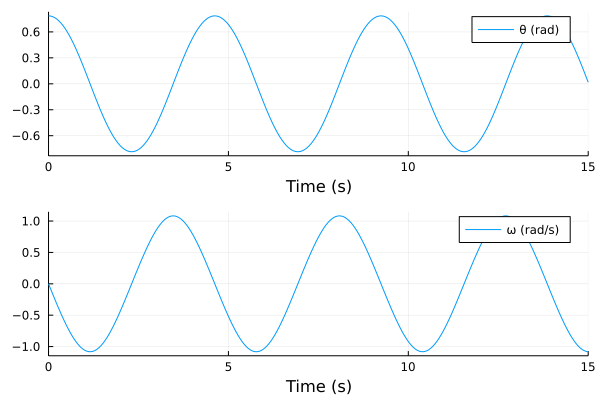

In [6]:
plot(sol, xaxis="Time (s)", label=["θ (rad)" "ω (rad/s)"], layout=(2,1), fmt = :png)

And so that is the motion of our pendulum. To check the stability of our code, let us plot its energy $E$. Recall that the energy of the pendulum may be given as:
\begin{equation}
    \label{eq3} E=\frac{1}{2}ml^2\dot{\theta}^2-m\mathrm{g}l\cos\theta
\end{equation}
So letting $m=1\,\mathrm{kg}$ in our case, and obtaining energy of the pendulum, we have

In [7]:
E = 1/2 * (l*sol[2,:]).^2 - g*l*cos.(sol[1,:]);

Then plotting this, we have:

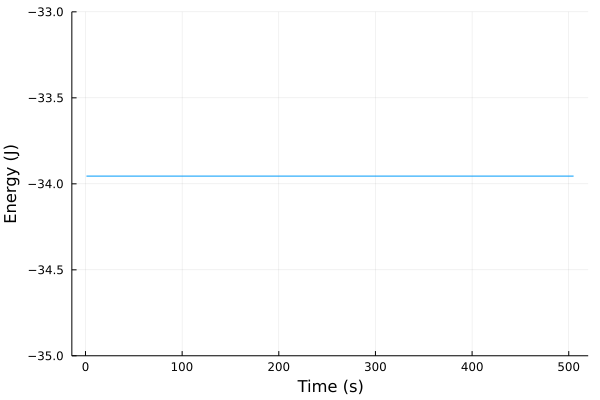

In [8]:
plot(E, xaxis="Time (s)", yaxis="Energy (J)", label="", ylim=(-35,-33), fmt = :png)

Since our energy is constant in time, then we can say that our solution is stable, and the resulting $\theta(t)$ and $\dot{\theta}(t)$ provided by ```solve``` is indeed an accurate solution!
*There is a little caveat: Energy is constant but only up to the first 8 decimal places, hence the need to plot energy in a larger scale.*

We can improve this further, by parametrizing the length of the pendulum. In this case, instead of having a constant length, let the length $l$ vary through time as $l(t)=l_0(1-\varepsilon\cos\Omega t)$. Substituting this to our equation of motion and using Taylor expansion in $\varepsilon$, the equations of motion of the system become:
\begin{equation}
    \ddot{\theta}+\dfrac{\mathrm{g}}{l_0}(1+\varepsilon\cos(\Omega t))\sin\theta=0.
\end{equation}

To implement this, we must first define a the parametric amplitude $\varepsilon$ and frequency $\Omega$, and parametric function $L(t)$ using:

In [9]:
epsilon = 0.9
Ω       = 1.0
L       = t->epsilon*cos(Ω*t);

After this, we change the ```ode``` function to:

In [10]:
function ode(du, u, p, t)
    du[1] = u[2]
    du[2] = -g/l * (1 + p(t)) * sin(u[1])
end;

where ```p(t)``` is the parametric function $L(t)$. Then passing this through our solver, we have:

In [11]:
probl = ODEProblem(ode, u0, t, L)
sol   = solve(probl, Tsit5(), reltol=1e-8, abstol=1e-8);

Then plotting, we have:

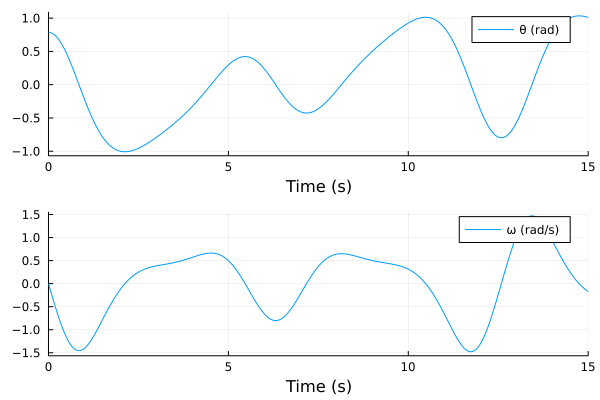

In [12]:
plot(sol, xaxis="Time (s)", label=["θ (rad)" "ω (rad/s)"], layout=(2,1), fmt = :png)

And that is our first parametric oscillator!